# <center>Credit Card Fraud Detection</center>

## Mini project Objective
Based on the input dataset Creadit Card Fraud Detection: Is the transaction fraudulent or not by using NumPy

---

## Student Information

**Student:**
- Full Name: Cao Trần Bá Đạt
- Student ID: 23127168

**Class:** 23KHDL

## <center>MODELING</center>

#### 1. Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read file from file created from preprocessing step

In [2]:
data = np.load("../data/processed/creditcard_preprocessed.npz")

X_train = data["X_train"]
y_train = data["y_train"]
X_test  = data["X_test"]
y_test  = data["y_test"]
pos_weight = data["pos_weight"]

# tạo sample_weights cho training
sample_weights = np.where(y_train == 1, pos_weight, 1.0)

print("Data loaded.")
print(X_train.shape, y_train.shape)


Data loaded.
(227845, 30) (227845,)


#### 4. Implement logistic regression

In [ ]:
class LogisticRegressionNumpy:
    def __init__(self, lr=0.01, epochs=2000, reg_lambda=0.0, fit_intercept=True):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.fit_intercept = fit_intercept

    def _add_intercept(self, X):
        if not self.fit_intercept:
            return X
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def sigmoid(self, z):
        # ổn định số học
        z = np.clip(z, -30, 30)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, sample_weights=None):
        X = self._add_intercept(X)
        n_samples, n_features = X.shape

        # khởi tạo vector trọng số
        self.w = np.zeros(n_features)

        # nếu không truyền sample_weights → tạo vector toàn 1
        if sample_weights is None:
            sample_weights = np.ones(n_samples)

        # GD không loop theo mẫu
        for epoch in range(self.epochs):

            # 1) linear combination
            z = X.dot(self.w)

            # 2) sigmoid
            preds = self.sigmoid(z)

            # 3) error vector (vectorized)
            error = preds - y

            # 4) weighted gradient (VECTOR HOÁ)
            grad = X.T.dot(error * sample_weights) / n_samples

            # 5) L2 Regularization
            grad += self.reg_lambda * self.w

            # 6) Update weights
            self.w -= self.lr * grad

    def predict_proba(self, X):
        X = self._add_intercept(X)
        return self.sigmoid(X.dot(self.w))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


#### 5. Run the model

In [4]:
model = LogisticRegressionNumpy(
    lr=0.05,
    epochs=5000,
    reg_lambda=0.001
)

model.fit(X_train, y_train, sample_weights=sample_weights)

print("Training completed.")


Training completed.


#### 6. Implement metrics.

In [5]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-8)

#### 7. Model evaluation

In [6]:
y_pred = model.predict(X_test, threshold=0.5)

print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9778448790421684
Precision: 0.07121661721015418
Recall: 0.9056603772730509
F1 Score: 0.13204951721589547


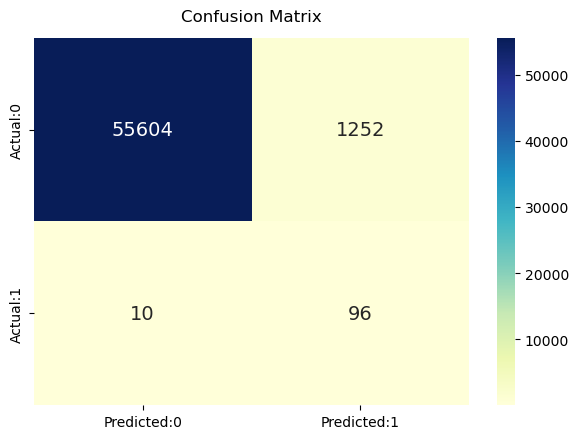

In [7]:
# Tính confusion matrix (counts)
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))
tp = np.sum((y_test == 1) & (y_pred == 1))

cm = np.array([[tn, fp],
               [fn, tp]])

# Vẽ
plt.figure(figsize=(6,4.5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
                 xticklabels=['Predicted:0', 'Predicted:1'],
                 yticklabels=['Actual:0', 'Actual:1'],
                 annot_kws={"size":14})
ax.set_title('Confusion Matrix', pad=12)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

#### 8. Results analyst

- Strengths

    - The model detected 96 fraudulent transactions

    - Only missed 10 frauds, meaning a very high Recall = 90.56%

    - Large number of TN → the model still recognizes Non-Fraud well

    - The model is really capable of catching fraud (does not fall into the trap of guessing all 0s)

- Weaknesses

    - FP = 1.252 → the model falsely reports many valid transactions

    - Low Precision (7.12%) → of the transactions predicted as Fraud, only 7% are real fraud

➡ This is a common feature of the model when prioritizing Recall (catching the most fraud).

Analyzing the indicators:

- Accuracy = 97.78%

    - Completely reasonable in the fraud detection problem

    - This metric should not be optimized because the dataset is very unbalanced

- Precision = 7.12%

    - Normal in Credit Card Fraud with Logistic Regression

    - Low because the model predicts quite a lot of transactions as fraud → prioritize Recall

- Recall = 90.56% (VERY GOOD)

    - The model detects 9/10 fraudulent transactions → great success

    - High Recall is the main goal in fraud detection

- F1-score = 13.20%

    - Reflects the trade-off between low Precision & high Recall

    - This value is completely reasonable

Overall Conclusion:

- Your model prioritizes Recall → detects most fraudulent transactions

- Precision is low but acceptable because Fraud is extremely rare

- This is the correct behavior of a real Fraud Detection model

- This result is much better than models that only achieve 99.9% Accuracy but have Recall close to 0

➡ Your model is really useful in fraud detection.